# San Francisco city employee salary data

<br>
<img src="img/san_francisco.png">
<br>

Um dos conjuntos de dados mais populares que as cidades normalmente lançam é sua estrutura salarial.

Foi processado e enviado o conjunto de dados de salários do SF para entender melhor como São Francisco paga a seus funcionários e o que isso pode nos informar sobre como a sede da cidade está sendo adminstrada.

Inicilamente, pede-se a média salarial das 10 profissões com maior incidência no relatório, considerando o ano de 2014, com uma visualização de sua distribuição.

Alguns ângulos potencialmente interessantes de exploração:

- Das 10 profissões com maior incidência, quantos trabalhadores ganham acima e abaixo da média?
- Como o orçamento é alocado com base em diferentes grupos e responsabilidades?

## Importando as bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

## Importando o dataset

In [2]:
df = pd.read_csv(r'./dados/salaries.csv')

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.shape

(148654, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


## Analisando os dados

### Criando máscara com dados de 2014

In [6]:
ano_2014 = df[df['Year']==2014] #máscara com o ano de 2014

### Identificando os top 10 salários

In [7]:
top_10_profissoes = ano_2014['JobTitle'].value_counts().head(10) #top 10 profissões com maior incidência em 2014
top_10_profissoes

Transit Operator                2479
Special Nurse                   1478
Registered Nurse                1234
Public Svc Aide-Public Works     916
Firefighter                      815
Custodian                        804
Police Officer 3                 783
Recreation Leader                690
Patient Care Assistant           652
Deputy Sheriff                   617
Name: JobTitle, dtype: int64

In [8]:
media_top_10_profissoes = ano_2014.groupby('JobTitle', as_index=False).agg({"Id" : "count" , "TotalPay": "mean"})
media_top_10_profissoes.sort_values(['Id'], ascending = False).head(10)

,JobTitle,Id,TotalPay
939,Transit Operator,2479,61318.264522
843,Special Nurse,1478,33490.350629
724,Registered Nurse,1234,117023.096645
713,Public Svc Aide-Public Works,916,9318.180993
365,Firefighter,815,138998.251043
246,Custodian,804,48750.944502
657,Police Officer 3,783,136059.617842
721,Recreation Leader,690,7061.691348
616,Patient Care Assistant,652,47670.312377
271,Deputy Sheriff,617,115208.985624


### Histograma top 10 profissões

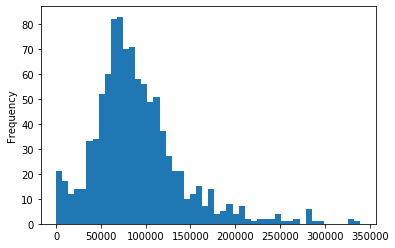

In [14]:
top_10["TotalPay"].plot(kind="hist", bins=50) #histograma do top 10 profissões, pela média de salário

## Quantos trabalhadores ganham acima e abaixo da média na função de Registered Nurse? E na de Deputy Sheriff?


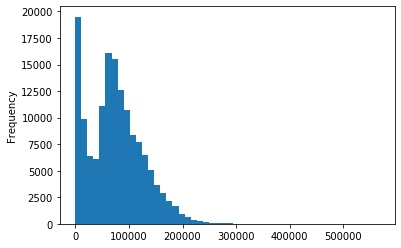

In [16]:
df['TotalPay'].plot.hist(bins=50) #histograma para verificar a curva de salários, densidade à esquerda e assim à direita

In [17]:
 df['TotalPay']= df['TotalPay'].replace(0.0, 1) #salários zerados alterados para 1

In [18]:
df['TotalPay'].value_counts(dropna=False).nlargest(7)

1.0         368
18594.0      82
123290.7     56
132242.5     49
105489.0     42
50913.3      39
17085.0      39
Name: TotalPay, dtype: int64

### Normalizando a curva do salário, criando coluna log_TotalPay

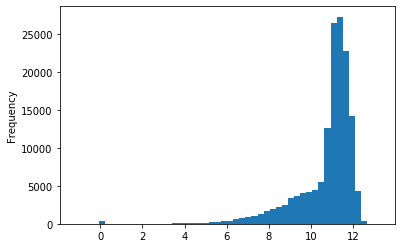

In [19]:
df['log_TotalPay'] = np.log(df['TotalPay']) #função log
df['log_TotalPay'].plot.hist(bins=50) 

### Normalização pela subtração da média e divisão pelo desvio padrão, individualmente criando uma coluna normal_log_TotalPay.

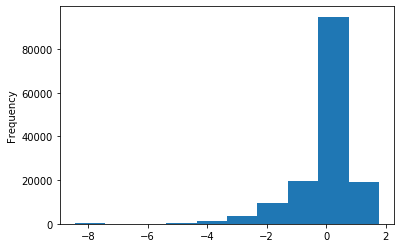

In [20]:
#normalização pela subtração da média e dividido pelo desvio padrão, próprios
df['normal_log_TotalPay'] = ( df['log_TotalPay'] - df['log_TotalPay'].mean() ) / df['log_TotalPay'].std() #criando a coluna
df['normal_log_TotalPay'].plot.hist(bins=10) 

### Estudando a coluna normalizada: média e desvio padrão

In [21]:
x = df['normal_log_TotalPay'] #estudando a coluna normalizada, 

mu = np.mean(x)
std = np.std(x)
mu,std

(2.6881621804733866e-14, 0.999996636456419)

### Calculando o p_value

In [22]:
import scipy
from scipy import stats
scipy.stats.norm(mu, std).pdf(2*std) #o p_value é o valor fora dos 95% , neste caso melhor se for 0,05

0.05399114811477063

### Calculando o z_score

In [23]:
scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.959957392115748, 1.9599573921158018)

In [24]:
Z_score_inf = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
Z_score_sup = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]

## Respondendo às perguntas: 
### Das 10 profissões com maior incidência, quantos trabalhadores ganham acima e abaixo da média?

In [27]:
top_10.head(10)

,JobTitle,Id,TotalPay
939,Transit Operator,2479,61318.264522
843,Special Nurse,1478,33490.350629
724,Registered Nurse,1234,117023.096645
713,Public Svc Aide-Public Works,916,9318.180993
365,Firefighter,815,138998.251043
246,Custodian,804,48750.944502
657,Police Officer 3,783,136059.617842
721,Recreation Leader,690,7061.691348
616,Patient Care Assistant,652,47670.312377
271,Deputy Sheriff,617,115208.985624


In [28]:
resultado_top_10 =(df.loc[df['JobTitle'].isin(['Transit Operator', 'Special Nurse', 'Registered Nurse','Public Svc Aide-Public Works',
                                  'Firefighter','Custodian','Police Officer 3','Police Officer 3','Recreation Leader',
                                  'Patient Care Assistant','Deputy Sheriff'])])

#### Abaixo da média

In [29]:
resultado_top_10_abaixo_media = resultado_top_10[resultado_top_10['normal_log_TotalPay']<-1.96]

In [30]:
resultado_top_10_abaixo_media.head(4) #tabela de resultado mostrando apenas 4 registros

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,log_TotalPay,normal_log_TotalPay
70249,70250,Alfred Hemmitt,Custodian,0,0,1992.04,3638.22,1992.04,5630.26,2012,NaN,San Francisco,NaN,7.596915,-2.221210
70502,70503,Salih Abdolcader,Transit Operator,2864.03,0,0,1878.96,2864.03,4742.99,2012,NaN,San Francisco,NaN,7.959985,-1.964556
70528,70529,Frank Montbach,Transit Operator,2826.84,0,0,1840.22,2826.84,4667.06,2012,NaN,San Francisco,NaN,7.946915,-1.973796
70719,70720,Giselle Burgos,Special Nurse,0,0,452.61,3664.3,452.61,4116.91,2012,NaN,San Francisco,NaN,6.115031,-3.268750


In [31]:
resultado_top_10_abaixo_media.shape #resultado para a quantidade de salários abaixo da média em top 10

(2364, 15)

Existem 2364 trabalhadores ganhando abaixo da média (em todas as funções).

#### Acima da média

In [32]:
resultado_top_10_acima_media = resultado_top_10[resultado_top_10['normal_log_TotalPay']>1.96]

In [33]:
resultado_top_10_acima_media.head(4) #tabela de resultado

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,log_TotalPay,normal_log_TotalPay


In [34]:
resultado_top_10_acima_media.shape #resultado para a quantidade de salários acima da média em top 10

(0, 15)

Não existem trabalhadores ganhando acima da média (em todas as funções).

## Verificando o salário mais alto no dataset
Por não termos funcionários com salário acima da média, precisamos descobrir qual o nível de confiança necessário para o maior salário.
Para isso vamos calcular o p_value da normalização e o alpha_max.

### Verificando o maior valor (salário normalizado - log)

In [35]:
df['normal_log_TotalPay'].max() #valor máximo da coluna

1.7743520229278988

### Calculando o p_value

In [36]:
scipy.stats.norm(mu, std).sf(df['normal_log_TotalPay'].max()) #p_value

0.03800197694398879

### Calculando o alpha

In [37]:
alpha_max = 1-scipy.stats.norm(mu, std).sf(df['normal_log_TotalPay'].max())
#alfa máximo - são os 95%, área da curva embaixo da curva de não rejeição - 
#valores entre 2 desvios padrão para mais e 2 para menos
alpha_max 

0.9619980230560112

In [39]:
print (round(alpha_max*100,0), '%', ' de certeza que não existe funcionário ganhando mais que a média.' )
print ('O melhor salário está com um nível de significância de', round(alpha_max*100,0), '%')

96.0 %  de certeza que não existe funcionário ganhando mais que a média.
O melhor salário está com um nível de significância de 96.0 %


## Respondendo à pergunta: 
### Quantos trabalhadores ganham acima e abaixo da média na função de Registered Nurse? E na de Deputy Sheriff?


In [40]:
registered_nurse_ac = resultado_top_10_acima_media.loc[resultado_top_10_acima_media['JobTitle']=='Registered Nurse']
registered_nurse_ab = resultado_top_10_abaixo_media.loc[resultado_top_10_abaixo_media['JobTitle']=='Registered Nurse']

deputy_sheriff_ac = resultado_top_10_acima_media.loc[resultado_top_10_acima_media['JobTitle']=='Deputy Sheriff']
deputy_sheriff_ab = resultado_top_10_abaixo_media.loc[resultado_top_10_abaixo_media['JobTitle']=='Deputy Sheriff']


print('O cargo Registered Nurse apresenta ', registered_nurse_ac.Id.count(), 'salários acima da média e',  registered_nurse_ab.Id.count(), 'salários abaixo da média.')
print('O cargo Deputy Sheriff ', deputy_sheriff_ac.Id.count(), 'salários acima da média e',  deputy_sheriff_ab.Id.count(), 'salários abaixo da média.')


O cargo Registered Nurse apresenta  0 salários acima da média e 29 salários abaixo da média.
O cargo Deputy Sheriff  0 salários acima da média e 31 salários abaixo da média.
